# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 `주제`를 찾아내기 위한 기술
* 토픽 모델링은 '`특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

## 1. 잠재 의미 분석(Latent Semantic Analysis)

* 더 성능이 좋음
* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 `잠재적인 토픽`을 발견하는 것
* 잠재적인 토픽은 `문서에 있는 단어들의 분포`를 주도한다고 가정

* LSA 방법
  + 문서 모음에서 생성한 `문서-단어 행렬(Document Term Matrix)`에서 `단어-토픽 행렬(Term-Topic Matrix)`과 `토픽-중요도 행렬(Topic-Importance Matrix)`, 그리고 `토픽-문서 행렬(Topic-Document Matrix)`로 분해

## 2. 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽이 `개수를 지정`해 알고리즘에 전달
  2. `모든 단어들을 토픽 중 하나에 할당`
  3. 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, `$p(t|d)$, $p(w|t)$에 따라 토픽을 재할당`, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$ - 문서 d의 단어들 중 토픽 t에 해당하는 비율
* 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    

* $p(w|t)$- 단어 w를 가지고 있는 모든 문서들 중  토픽 t가 할당된 비율
* 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

--------------------------------------------------------

## 데이터 전처리

In [1]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                            remove=('headers', 'footers', 'quotes'))

documents = dataset.data

print(len(documents))
documents[0]
#텍스트는 개행문자, 특수문자 등 정제가 안되어있음

11314


"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

* 데이터 전처리

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import preprocess_string

nltk.download('stopwords')

C:\Users\bini\anaconda3\envs\anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# 데이터 정제

def clean_text(d) :
    pattern = r'[^a-zA-Z\s]' #알파벳만
    text = re.sub(pattern, '', d)
    return d

def clean_stopwords(d) :
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 3])

def preprocessing(d) :
    return preprocess_string(d)

In [4]:
import pandas as pd 

news_df = pd.DataFrame({'article' : documents})
len(news_df)

11314

In [5]:
news_df.replace("", float("NaN"), inplace =True) #NaN으로 변환
#news_df.isnull().values.any() #isnull인것있나확인
news_df.dropna(inplace=True) #null값 제외
print(len(news_df))

11096


In [6]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

0        Well i'm not sure about the story nad it did s...
1        \n\n\n\n\n\n\nYeah, do you expect people to re...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well, I will have to change the scoring on my ...
                               ...                        
11309    Danny Rubenstein, an Israeli journalist, will ...
11310                                                   \n
11311    \nI agree.  Home runs off Clemens are always m...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          ^^^^^^\n...
Name: article, Length: 11096, dtype: object

In [7]:
news_df['article'] = news_df['article'].apply(clean_stopwords)
news_df['article']

0        well sure story seem biased. disagree statemen...
1        yeah, expect people read faq, etc. actually ac...
2        although realize principle strongest points, w...
3        notwithstanding legitimate fuss proposal, much...
4        well, change scoring playoff pool. unfortunate...
                               ...                        
11309    danny rubenstein, israeli journalist, speaking...
11310                                                     
11311    agree. home runs clemens always memorable. kin...
11312    used deskjet orange micros grappler system6.0....
11313    ^^^^^^ argument murphy. scared hell came last ...
Name: article, Length: 11096, dtype: object

In [8]:
#preprocessing 하면 토큰화된다
tokenized_news = news_df['article'].apply(preprocessing)
tokenized_news = tokenized_news.to_list()
tokenized_news[:2]

[['sure',
  'stori',
  'bias',
  'disagre',
  'statement',
  'media',
  'ruin',
  'israel',
  'reput',
  'redicul',
  'media',
  'pro',
  'isra',
  'media',
  'world',
  'live',
  'europ',
  'realiz',
  'incid',
  'describ',
  'letter',
  'occur',
  'media',
  'ignor',
  'subsid',
  'israel',
  'exist',
  'european',
  'degre',
  'think',
  'reason',
  'report',
  'clearli',
  'atroc',
  'shame',
  'austria',
  'daili',
  'report',
  'inhuman',
  'act',
  'commit',
  'isra',
  'soldier',
  'bless',
  'receiv',
  'govern',
  'make',
  'holocaust',
  'guilt',
  'awai',
  'look',
  'jew',
  'treat',
  'race',
  'power',
  'unfortun'],
 ['yeah',
  'expect',
  'peopl',
  'read',
  'faq',
  'actual',
  'accept',
  'hard',
  'atheism',
  'need',
  'littl',
  'leap',
  'faith',
  'jimmi',
  'logic',
  'run',
  'steam',
  'jim',
  'sorri',
  'piti',
  'jim',
  'sorri',
  'feel',
  'denial',
  'faith',
  'need',
  'pretend',
  'happili',
  'mayb',
  'start',
  'newsgroup',
  'alt',
  'atheist',


In [9]:
import numpy as np

#1글자로된 문장은 지움
drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis=0)
news_texts[:2]

C:\Users\bini\anaconda3\envs\anaconda\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


array([list(['sure', 'stori', 'bias', 'disagre', 'statement', 'media', 'ruin', 'israel', 'reput', 'redicul', 'media', 'pro', 'isra', 'media', 'world', 'live', 'europ', 'realiz', 'incid', 'describ', 'letter', 'occur', 'media', 'ignor', 'subsid', 'israel', 'exist', 'european', 'degre', 'think', 'reason', 'report', 'clearli', 'atroc', 'shame', 'austria', 'daili', 'report', 'inhuman', 'act', 'commit', 'isra', 'soldier', 'bless', 'receiv', 'govern', 'make', 'holocaust', 'guilt', 'awai', 'look', 'jew', 'treat', 'race', 'power', 'unfortun']),
       list(['yeah', 'expect', 'peopl', 'read', 'faq', 'actual', 'accept', 'hard', 'atheism', 'need', 'littl', 'leap', 'faith', 'jimmi', 'logic', 'run', 'steam', 'jim', 'sorri', 'piti', 'jim', 'sorri', 'feel', 'denial', 'faith', 'need', 'pretend', 'happili', 'mayb', 'start', 'newsgroup', 'alt', 'atheist', 'hard', 'bummin', 'bye', 'bye', 'jim', 'forget', 'flintston', 'chewabl', 'bake', 'timmon'])],
      dtype=object)

In [10]:
len(news_texts)

10936

## Gensim을 이용한 토픽 모델링

In [11]:
from gensim import corpora

dictionary = corpora.Dictionary(news_texts)
corpus = [dictionary.doc2bow(text) for text in news_texts]

print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 4), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)]


## 잠재의미 분석을 위한 LsiModel

In [12]:
from gensim.models import LsiModel

lsi_model = LsiModel(corpus, num_topics=20, id2word=dictionary)
topics = lsi_model.print_topics()
topics

[(0,
  '-0.994*"max" + -0.069*"giz" + -0.068*"bhj" + -0.025*"qax" + -0.015*"biz" + -0.014*"nrhj" + -0.014*"bxn" + -0.012*"nui" + -0.011*"ghj" + -0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '-0.408*"file" + -0.335*"output" + -0.216*"entri" + 0.171*"peopl" + 0.153*"know" + -0.137*"onam" + -0.134*"program" + 0.131*"said" + -0.129*"printf" + -0.115*"char"'),
 (3,
  '0.249*"imag" + 0.226*"edu" + -0.214*"output" + -0.165*"peopl" + -0.157*"know" + -0.155*"entri" + -0.153*"said" + 0.153*"avail" + 0.142*"jpeg" + 0.124*"pub"'),
 (4,
  '0.549*"wire" + 0.223*"ground" + -0.214*"jpeg" + -0.213*"file" + -0.169*"imag" + 0.164*"circuit" + 0.157*"outlet" + 0.139*"connect" + 0.129*"subject" + 0.126*"neutral"'),
 (5,
  '-0.400*"jpeg" + -0.345*"imag" + 0.276*"anonym" + -0.246*"wire" + 0.160*"privaci" + 0.156*"internet" + -0.151*"color" + 0.144*"post" + 0.125*"info

* 어떠한 토픽 개수를 가지는게 좋은지를 계산할 수 있음

In [13]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 10,30
coherence_scores = []

for num_topics in range(min_topics, max_topics) :
    model = LsiModel(corpus, num_topics, id2word=dictionary)
    coherence = CoherenceModel(model = model,
                              texts = news_texts,
                              dictionary=dictionary)
    coherence_scores.append(coherence.get_coherence())

In [14]:
coherence_scores

[0.4587649513145105,
 0.595067985895893,
 0.4442377373418294,
 0.40706035099367727,
 0.4800683411754661,
 0.5079107109852528,
 0.43071409831285346,
 0.37598535647003145,
 0.4653439929020219,
 0.4126143722067244,
 0.45336588841755426,
 0.4390316728200946,
 0.4848393942343232,
 0.5283762301310811,
 0.4523389405278506,
 0.476841617802928,
 0.4768638742301873,
 0.40078346028652945,
 0.5254624351569961,
 0.4695100480526465]

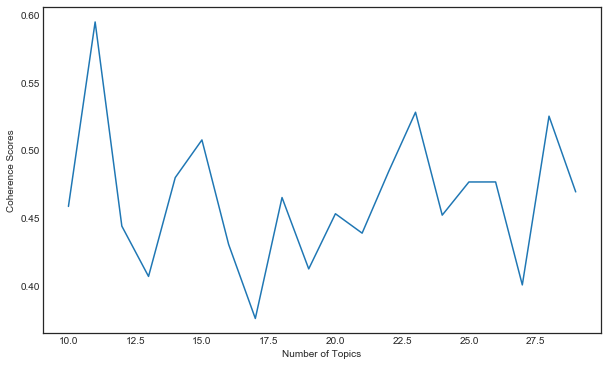

In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [16]:
lsi_model = LsiModel(corpus, num_topics=24, id2word=dictionary)
topics = lsi_model.print_topics(num_topics=24)
topics

[(0,
  '0.994*"max" + 0.069*"giz" + 0.068*"bhj" + 0.025*"qax" + 0.015*"biz" + 0.014*"nrhj" + 0.014*"bxn" + 0.012*"nui" + 0.011*"ghj" + 0.011*"zei"'),
 (1,
  '-0.381*"file" + -0.193*"program" + -0.169*"edu" + -0.162*"imag" + -0.130*"avail" + -0.126*"output" + -0.119*"includ" + -0.115*"inform" + -0.101*"pub" + -0.100*"time"'),
 (2,
  '0.408*"file" + 0.335*"output" + 0.216*"entri" + -0.171*"peopl" + -0.153*"know" + 0.137*"onam" + 0.134*"program" + -0.131*"said" + 0.129*"printf" + 0.115*"char"'),
 (3,
  '0.249*"imag" + 0.226*"edu" + -0.214*"output" + -0.165*"peopl" + -0.157*"know" + -0.155*"entri" + -0.153*"said" + 0.153*"avail" + 0.142*"jpeg" + 0.124*"pub"'),
 (4,
  '-0.549*"wire" + -0.223*"ground" + 0.214*"jpeg" + 0.213*"file" + 0.169*"imag" + -0.164*"circuit" + -0.157*"outlet" + -0.139*"connect" + -0.129*"subject" + -0.126*"neutral"'),
 (5,
  '-0.400*"jpeg" + -0.345*"imag" + 0.276*"anonym" + -0.246*"wire" + 0.160*"privaci" + 0.156*"internet" + -0.151*"color" + 0.144*"post" + 0.125*"info

## 잠재 디리클레 할당을 위한 LdaModel

In [17]:
from gensim.models import LdaModel

#20개 토픽으로 고정해놓고 
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary)
topics = lda_model.print_topics()
topics

[(0,
  '0.008*"secur" + 0.007*"encrypt" + 0.006*"ripem" + 0.005*"technolog" + 0.005*"kei" + 0.004*"like" + 0.004*"clipper" + 0.004*"order" + 0.004*"govern" + 0.004*"exist"'),
 (1,
  '0.008*"islam" + 0.007*"book" + 0.006*"like" + 0.006*"think" + 0.005*"read" + 0.005*"greek" + 0.005*"know" + 0.005*"post" + 0.004*"peopl" + 0.004*"exist"'),
 (2,
  '0.010*"program" + 0.009*"entri" + 0.009*"file" + 0.007*"problem" + 0.007*"time" + 0.005*"post" + 0.005*"work" + 0.005*"like" + 0.004*"food" + 0.004*"filenam"'),
 (3,
  '0.211*"max" + 0.023*"giz" + 0.020*"bhj" + 0.016*"bxn" + 0.009*"buf" + 0.008*"qax" + 0.006*"chz" + 0.005*"nrhj" + 0.005*"nui" + 0.004*"fij"'),
 (4,
  '0.015*"peopl" + 0.011*"think" + 0.008*"know" + 0.007*"right" + 0.007*"like" + 0.006*"time" + 0.006*"thing" + 0.006*"year" + 0.005*"believ" + 0.005*"govern"'),
 (5,
  '0.021*"scsi" + 0.012*"tobacco" + 0.009*"team" + 0.009*"game" + 0.006*"detector" + 0.006*"pen" + 0.005*"cap" + 0.004*"radar" + 0.004*"yanke" + 0.004*"pittsburg"'),
 (6,

In [18]:
#coherenceModel로 제일 좋은 토픽 수가 몇개인지 찾기
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 10,30
coherence_scores = []

for num_topics in range(min_topics, max_topics) :
    model = LdaModel(corpus, num_topics, id2word=dictionary)
    coherence = CoherenceModel(model = model,
                              texts = news_texts,
                              dictionary=dictionary)
    coherence_scores.append(coherence.get_coherence())

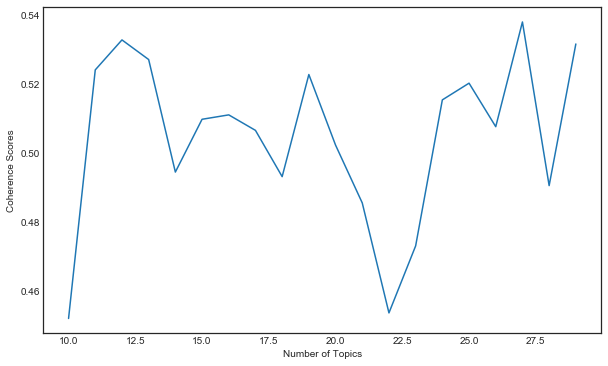

In [19]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [20]:
lda_model = LdaModel(corpus, num_topics=23, id2word=dictionary)
topics = lda_model.print_topics(num_topics=23)
topics

[(0,
  '0.038*"armenian" + 0.011*"said" + 0.009*"peopl" + 0.009*"muslim" + 0.008*"turkish" + 0.007*"azerbaijan" + 0.006*"turk" + 0.006*"went" + 0.006*"russian" + 0.006*"genocid"'),
 (1,
  '0.036*"drive" + 0.011*"contest" + 0.009*"power" + 0.007*"work" + 0.007*"tape" + 0.006*"period" + 0.006*"hard" + 0.005*"floppi" + 0.005*"like" + 0.005*"disk"'),
 (2,
  '0.016*"entri" + 0.014*"obfusc" + 0.009*"myer" + 0.008*"winner" + 0.008*"author" + 0.008*"len" + 0.006*"edu" + 0.006*"church" + 0.005*"row" + 0.005*"cathol"'),
 (3,
  '0.009*"cluster" + 0.006*"reuss" + 0.005*"bruin" + 0.004*"ottawa" + 0.004*"dale" + 0.003*"gsfc" + 0.003*"alomar" + 0.003*"neeli" + 0.003*"servant" + 0.003*"edu"'),
 (4,
  '0.013*"peopl" + 0.009*"christian" + 0.008*"think" + 0.007*"believ" + 0.007*"know" + 0.007*"jesu" + 0.006*"word" + 0.006*"thing" + 0.006*"like" + 0.005*"mean"'),
 (5,
  '0.008*"know" + 0.008*"like" + 0.007*"time" + 0.007*"gun" + 0.006*"think" + 0.006*"peopl" + 0.006*"right" + 0.006*"look" + 0.005*"want" +

## 토픽 모델링 시각화
* 파이썬에서 LDA를 시각화해줄 수 있는 라이브러리 `pyLDAvis`

In [25]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\bini\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
C:\Users\bini\anaconda3\envs\anaconda\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\bini\anaconda3\envs\anaconda\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
